# 카메라 스티커 프로젝트
---

## 1. 정상적인 사진

In [1]:
# 사용할 모듈 불러오기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

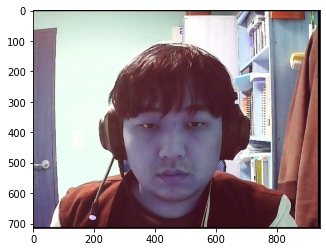

In [2]:
# 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img123.png'
img_bgr = cv2.imread(my_image_path,-1)
img_bgr2 = img_bgr.copy() # 원본 이미지 저장~~
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

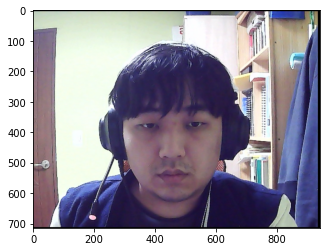

In [3]:
# rgb 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector()

In [5]:
# detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(312, 313) (633, 634)]]


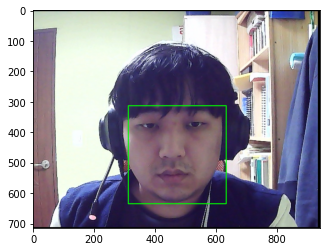

In [6]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

# 얼굴 영역 박스마다 face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


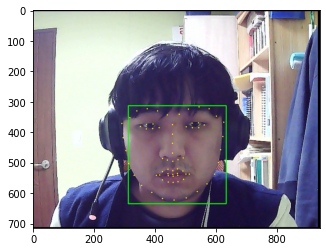

In [9]:
# 랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] + dlib_rect.height() // 10
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(462, 622)
(x,y) : (462,654)
(w,h) : (322,322)


In [11]:
# 스티커 이미지 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(322, 322, 3)


In [12]:
# x,y 좌표 조정
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (301,332)


In [13]:
# 조정한 좌표가 음수가 나올 경우 스티커를 crop
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (301,332)


In [14]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

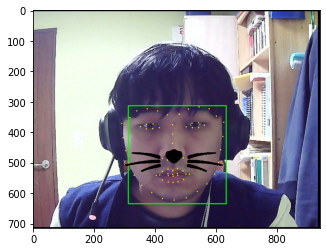

In [15]:
# 결과 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

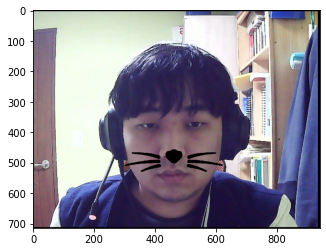

In [16]:
# bounding box와 landmark를 제거한 최종 결과
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 정상적인 사진에 대한 회고   
성공적으로 코에 고양이 수염 이미지가 붙게 했다!!   
처음 시도했을땐 노드의 코드를 참고해서 작성했는데, 고양이 수염쪽이 투명해지고, 배경이 하얀색으로 나타나는 문제가 생겼었다.    
np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)   
해당 코드가 노드에 있는 코드에서는 img_sticker==0 으로 되어있었는데, 이 부분을 수정해줘서 해결했다.   

## 2. 문제가 있는 사진
### 2.1 얼굴이 사진의 아랫쪽에 위치했을 때

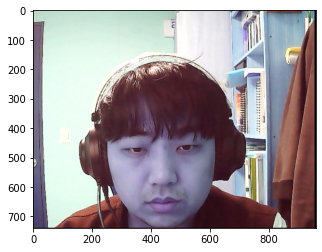

In [17]:
# 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img_00000.png'
img_bgr = cv2.imread(my_image_path,-1)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

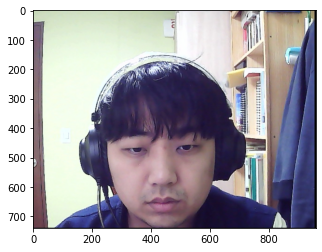

In [18]:
# rgb 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(247, 376) (632, 761)]]


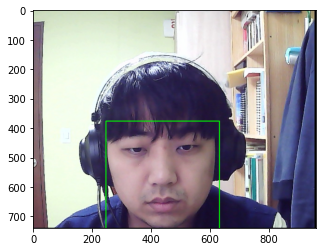

In [19]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector()

# detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


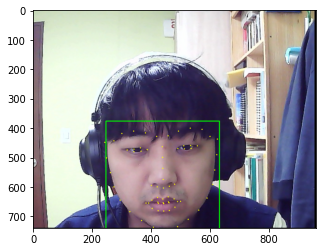

In [20]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스마다 face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [21]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] + dlib_rect.height() // 10
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(449, 741)
(x,y) : (449,779)
(w,h) : (386,386)


In [22]:
# 스티커 이미지 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)


(386, 386, 3)


In [23]:
# x,y 좌표 조정
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (256,393)


In [24]:
# 조정한 좌표가 음수가 나올 경우 스티커를 crop
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (256,393)


In [25]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

ValueError: operands could not be broadcast together with shapes (386,386,3) (346,386,3) (386,386,3) 

해당 부분에서 ValueError가 일어난다.   
에러 내용을 확인해보면 마지막에 shapes (386,386,3) (346,386,3) (386,386,3) 이라고 나오는데, sticker_area의 shape가 다른 둘과 맞지 않아 생기는 오류인듯하다.   
   
---
   
### 얼굴이 사진 아래쪽에 위치했을 때에 대한 회고
   
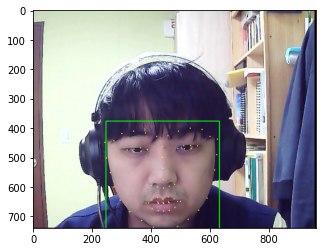

해당 이미지를 잘보면 박스의 아랫쪽이 사진 밑으로 묻혀 안나오고, 턱 제일 아래쪽의 랜드마크도 안보인다.   
이 문제로 인해, sticker 이미지의 크기를 w,h 로 박스의 크기로 맞춰줬는데, 박스가 짤려나가며 해당 sticker_area의 shape도 아래쪽 부분이 짤려 shape가 작아진것이 아닐까 생각이 들었다.   
사실 처음에 이 사진을 가지고 프로젝트를 진행했었는데, 이 에러를 해결하기 위해 여러 방법을 시도해봤다.   
첫번째로 생각해본게, 위의 refined 좌표가 음수일때 crop을 해주는 코드를 참고해서, refined 좌표가 사진의 크기를 벗어나면 그 부분을 잘라주는 거였는데, 이 방법은 아무 소용이 없었다.... 결국은 sticker_area의 크기도 줄어드는거라 상황이 똑같았기 때문이다..   
두번째로 시도해본건 이 에러가 생기지 않는 상황을 찾아보는 거였다. 뭐가 문제인지를 아는게 중요하다고 생각했다.   
그래서 refined 좌표를 조금 수정해서 sticker_area가 잘리지 않는 좌표로 만들어줘 봤다.   
---

In [26]:
refined_x = x - w // 2
refined_y = y - h -50
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

(x,y) : (256,343)
(x,y) : (256,343)


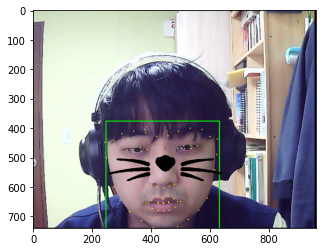

In [27]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


그 결과 에러 없이 출력은 잘 되는 것을 확인했다.   
해당 사진에서 고양이 수염 이미지를 더 아래로 내려주는걸 원했지만, 좌표를 아래쪽으로 더 보내면 에러가 발생했고, 여러 시도를 해봐도 도저히 해결이 안되었다.   
그래서 결국 이 사진을 포기하고 다른 사진을 새로 찍어 프로젝트를 다시 진행했다.

### 2.2 얼굴이 기울어진 사진

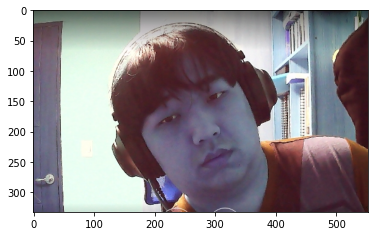

In [28]:
# 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img_test1.jpg'
img_bgr = cv2.imread(my_image_path,-1)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

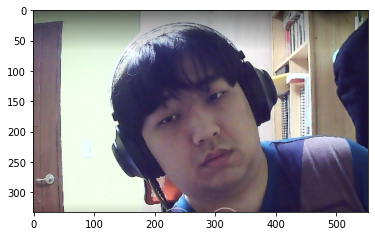

In [29]:
# rgb 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(167, 93) (390, 316)]]


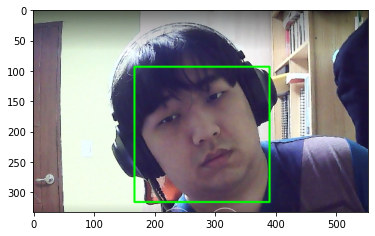

In [30]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector()

# detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


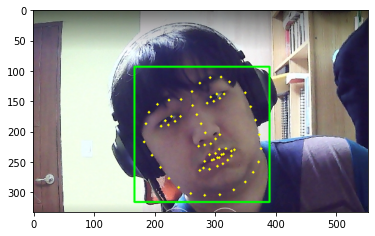

In [31]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스마다 face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [32]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] + dlib_rect.height() // 10
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(331, 296)
(x,y) : (331,318)
(w,h) : (224,224)


In [33]:
# 스티커 이미지 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(224, 224, 3)


In [34]:
# x,y 좌표 조정
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (219,94)


In [35]:
# 조정한 좌표가 음수가 나올 경우 스티커를 crop
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (219,94)


In [36]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

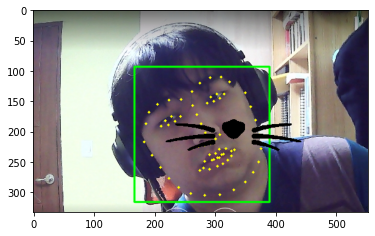

In [37]:
# 결과 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

---
### 얼굴이 기울어진 사진에 대한 회고
1번에서 했던 코드를 그대로 적용시키게 되면, 고양이 수염의 위치 x좌표가 그대로 랜드마크 8번, 턱 제일 아래쪽을 기준으로 잡히게되어 위와 같은 이미지가 생성되게 된다.
이를 해결하기 위해선 얼굴의 각도를 계산해서, 그만큼 고양이 수염 이미지를 회전시키면 되지 않을까 생각했다.   
얼굴이 수평일때는 그대로 수평이고, 얼굴이 기울어지면 그만큼 기울어지는 위치인 코의 양쪽 끝 랜드마크, 31번과 35번을 이용해서 벡터를 계산하고, 이게 x축과 이루는 각도가 얼마나 되는지를 계산해보면 해결할 수 있지 않을까 생각해보고 방법을 찾아봤지만 해결하지 못했다......

# 프로젝트 회고
얼굴이 아랫쪽에 위치하는거랑 기울어진것 말고 다른 것들도 테스트해보고 싶었는데 시간이 모자라서 진행하지 못했다.   
얼굴을 먼곳에 두고 얼굴이 엄청 작게 나오게 찍어본다던가, 옆모습을 찍어본다던가, 불을 끄고 밝기를 확 어둡게 해서 찍어본다던가, 등등 해보고 싶은게 많았다.   
또 얼굴 각도를 기울인 부분도 어떻게 각을 계산하는 방법을 찾을수만 있었다면 시도해봤을텐데, 그러질 못했다.   
여러모로 아쉬운 점이 많은 프로젝트였다.   